#### <span style = "color:blue">TEAM</span>
김하니	국내학술대회 참가(상반기 중) <br>
	유조민	국내학술지/해외학술지 작성 및 투고
<br><hr>


#### 1. 개요 <br> 

해당 파일은 데이콘 공모전의 문제를 해결하기 위한 코드입니다 <br>
소득예측에 대한 문제를 해결하기 위해 딥러닝 모델을 구성하였습니다 <br>

#### 2. 데이터 수집 <br> 

- 데이터 출처
  데이콘 공모전에서 제공된 'train.csv' 파일과 'test.csv' 파일을 사용했습니다 <br>

- 수집 방법
  pandas 라이브러리를 사용하여 읽어들였습니다 <br>

- 수집된 데이터의 구조 및 특성 설명 <br>
  해당 데이터에는 ID, 나이, 성별, 교육 상태, 고용 상태, 연간 근무 주수, 산업 상태, 직업 상태, 인종, 히스패닉 출신 여부, 시민권 상태, 출생 국가, 부모 출생 국가, 세금 상태, 이득, 손실, 배당금, 소득 상태, 소득 등의 변수로 구성되어 있습니다 <br>

#### 3. 데이터 전처리 <br>

- 결측치 처리: 별도의 결측치 처리 과정은 없었습니다 <br>
- 이상치 처리: 별도의 이상치 처리 과정은 없었습니다 <br>
- 데이터 정규화/표준화: 별도의 정규화/표준화 과정은 없었습니다 <br>
- 피처 엔지니어링 (변수 선택 및 변환): 상관관계 분석을 통해 소득과 관련이 큰 변수들을 선택했습니다. 'Gain '와 'Dividends' 변수는 상관관계가 낮아 제거했습니다

#### 4. 데이터 탐색 및 시각화
   
- 기술통계 분석: 데이터프레임에서 int형 변수들만 추출하여 새로운 데이터프레임을 생성했습니다 <br>
- 데이터 분포 확인: 별도의 데이터 분포 확인 과정은 없습니다 <br>
상관관계 분석: 데이터 간의 상관관계를 히트맵으시각로 시각화 했습니다 <br>
중요 변수 시각화: 별도의 중요 변수 시각화은 없었습니다  <br> 

#### 5. 모델 구축 및 학습
- 모델 구조 설정: Sequential 모델을 사용했으며, 입력층, 은닉층, 출력층으로 구성되어 있습니다. 은닉층에는 Dropout 레이어를 추가하여 과적합을 방지했습니다.
- 모델 컴파일: Adam 최적화 알고리즘과 평균 제곱 오차 손실 함수를 사용했습니다.
- 모델 학습: EarlyStopping 콜백 함수를 사용하여 20 에폭 동안 개선이 없으면 자동으로 학습을 중단하도록 했습니다. 또한 ModelCheckpoint 콜백 함수를 사용하여 가장 좋은 모델을 저장했습니다.
- 모델 평가: 테스트 데이터를 사용하여 실제 가격과 예측 가격을 비교하는 시각화를 수행했습니다.

#### 6. 모델 적용 및 결과 제출
- 테스트 데이터 준비: 데이콘 테스트 데이터를 읽어들여 모델에 적용할 수 있는 형태로 변환했습니다.
- 모델 적용: 앞서 저장한 최적의 모델을 불러와 테스트 데이터에 적용하여 예측 값을 생성했습니다.
- 결과 제출: 예측 값과 ID를 포함한 CSV 파일을 생성하여 제출했습니다. <br>
  전반적으로 데이터 수집, 전처리, 탐색 및 시각화, 모델 구축 및 학습, 모델 적용 및 결과 제출 등의 과정을 잘 수행했습니다. <br> 특히 과적합 방지를 위한 Dropout 레이어 추가, EarlyStopping과 ModelCheckpoint 콜백 함수 사용 등의 기법을 적용한 점이 돋보입니다.


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [42]:
# 데이터 로드
df = pd.read_csv('/content/train.csv')

In [43]:
# 무작위 10개 데이터 확인해보기
df.sample(10)

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
1945,TRAIN_01945,12,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,0
5908,TRAIN_05908,43,F,College,Children or Armed Forces,26,Education,Admin Support (include Clerical),White,Chicano,...,Native (Born Abroad),Mexico,Mexico,US,Single,594,0,0,Under Median,425
19855,TRAIN_19855,37,M,High graduate,Children or Armed Forces,30,Construction,Craft & Repair,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,800
3681,TRAIN_03681,41,M,High graduate,Children or Armed Forces,52,Retail,Sales,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,1848,0,Unknown,0
9320,TRAIN_09320,41,M,High graduate,Full-Time,52,Transportation,Transportation,White,All other,...,Native,US,US,Unknown,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1000
3298,TRAIN_03298,0,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,Native American/Aleut/Eskimo,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
18345,TRAIN_18345,33,M,High graduate,Children or Armed Forces,1,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0
16233,TRAIN_16233,35,M,High graduate,Children or Armed Forces,36,Hospitals,Services,Black,All other,...,Native,US,US,US,Single,0,0,0,Unknown,810
952,TRAIN_00952,31,M,Kindergarten,Children or Armed Forces,39,Public Administration,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,400
18392,TRAIN_18392,59,F,High graduate,Full-Time,52,Retail,Craft & Repair,White,Mexican (Mexicano),...,Native,US,US,US,Married Filling Jointly one over 65 & one unde...,0,0,0,Under Median,896


In [44]:
# 데이터프레임에서 int형 변수들에 해당하는 값만 추출하여 새로운 데이터프레임 생성
int_values_df = df.select_dtypes(include='int64')

In [47]:
# 'int64' 데이터만 딥러닝에 사용
df = int_values_df

In [48]:
# 각 항목들 서로 간의 상관관계 확인
df.corr()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
Age,1.000000,0.206218,0.044156,0.053384,0.107565,0.124795
Working_Week (Yearly),0.206218,1.000000,0.053362,0.056658,0.002209,0.419628
Gains,0.044156,0.053362,1.000000,-0.013313,0.081115,0.009555
Losses,0.053384,0.056658,-0.013313,1.000000,0.015351,0.036502
Dividends,0.107565,0.002209,0.081115,0.015351,1.000000,0.002449
Income,0.124795,0.419628,0.009555,0.036502,0.002449,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

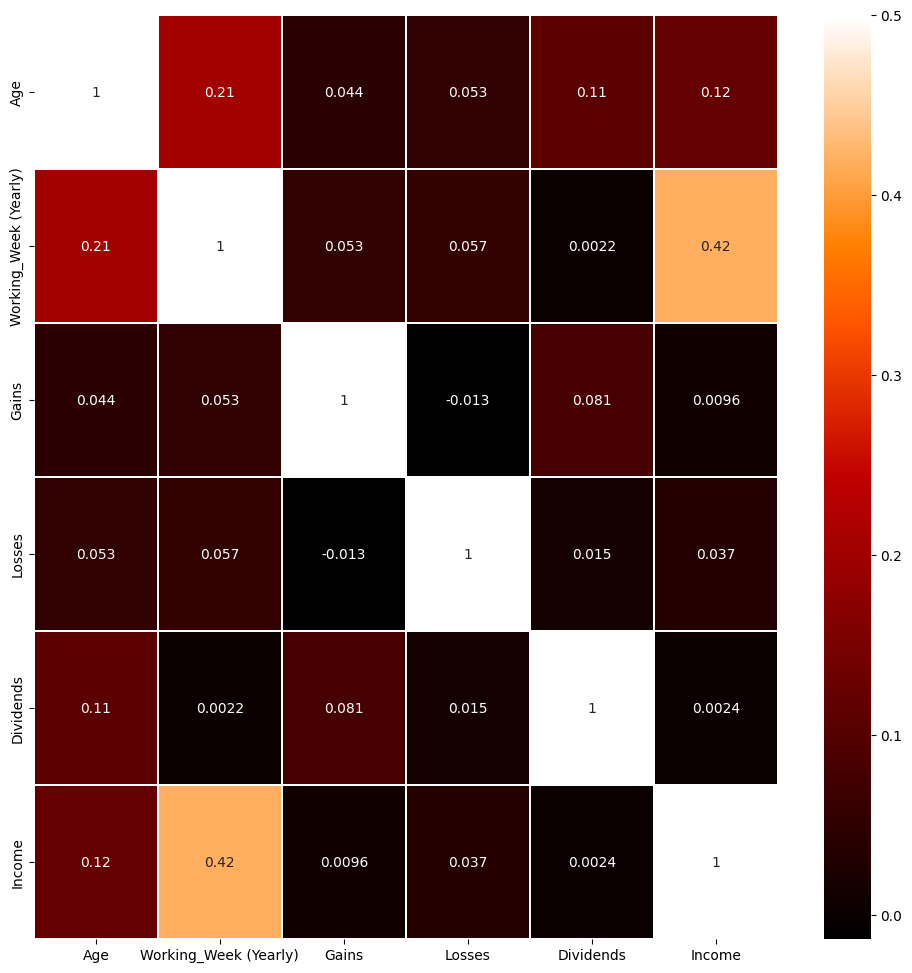

In [49]:
# 알아보기 쉽게 상관 관계를 히트 맵으로 표시
import matplotlib.pyplot as plt
colormap = plt.cm.gist_heat # 그래프 색상 구성
plt.figure(figsize = (12,12)) # 그래프 크기 구성

# 맷플로립보다 정교한 그래프를 제공하는 시본 라이브러리 사용
import seaborn as sns
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = colormap, linecolor = 'white', annot = True)
plt.show

In [50]:
# 데이터 사이의 상관 관계를 저장
df_corr = df.corr()

# 소득과 관련이 큰 순서대로 정렬
df_corr_sort = df_corr.sort_values('Income', ascending = False)

In [51]:
df_corr_sort

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
Income,0.124795,0.419628,0.009555,0.036502,0.002449,1.000000
Working_Week (Yearly),0.206218,1.000000,0.053362,0.056658,0.002209,0.419628
Age,1.000000,0.206218,0.044156,0.053384,0.107565,0.124795
Losses,0.053384,0.056658,-0.013313,1.000000,0.015351,0.036502
Gains,0.044156,0.053362,1.000000,-0.013313,0.081115,0.009555
Dividends,0.107565,0.002209,0.081115,0.015351,1.000000,0.002449


In [52]:
# 딥러닝에 사용할 독립 변수들 저장
# 상관관계에서 적은 상관관계를 나타낸 'Gains', 'Dividends' 제거
cols_train = ['Age', 'Working_Week (Yearly)', 'Losses']
X_train_pre = df[cols_train]

In [53]:
# 딥러닝에 사용할 종속 변수 저장
y = df['Income']

In [54]:
# 전체의 80%를 학습, 20%를 테스트 셋으로 사용
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)

In [55]:
# 모델 구조 설정

'''
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))

'''
from keras.layers import Dropout

model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout 추가
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))  # Dropout 추가
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.5))  # Dropout 추가
model.add(Dense(1))  # 출력 레이어에는 활성화 함수가 없음

In [56]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [57]:
# 모델 중단 범위 지정
'''
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)
'''

# 20번 이상 결과가 향상되지 않으면 자동으로 중단
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

# 모델의 경로 지정
modelpath = './data/model/dacon_model.hdf5'

# 최적화 모델 업데이트 하고 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_model = True)

In [58]:
# 모델 학습
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size = 32, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
375/375 [==============================] - 3s 5ms/step - loss: 466642.8438 - mean_squared_error: 466642.8438 - val_loss: 376257.9375 - val_mean_squared_error: 376257.9375
Epoch 2/2000
 46/375 [==>...........................] - ETA: 1s - loss: 445943.2500 - mean_squared_error: 445943.2500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 3s 8ms/step - loss: 431670.3438 - mean_squared_error: 431670.3438 - val_loss: 371829.5625 - val_mean_squared_error: 371829.5625
Epoch 3/2000
375/375 [==============================] - 2s 5ms/step - loss: 432768.2500 - mean_squared_error: 432768.2500 - val_loss: 372465.5312 - val_mean_squared_error: 372465.5312
Epoch 4/2000
375/375 [==============================] - 2s 5ms/step - loss: 429390.6875 - mean_squared_error: 429390.6875 - val_loss: 370897.0000 - val_mean_squared_error: 370897.0000
Epoch 5/2000
375/375 [==============================] - 2s 5ms/step - loss: 431738.4688 - mean_squared_error: 431738.4688 - val_loss: 370713.7812 - val_mean_squared_error: 370713.7812
Epoch 6/2000
375/375 [==============================] - 2s 4ms/step - loss: 426913.4375 - mean_squared_error: 426913.4375 - val_loss: 371289.8125 - val_mean_squared_error: 371289.8125
Epoch 7/2000
375/375 [==============================] - 2s 5ms/step - loss: 429533.4688 - mea

In [59]:
real_price = []
pred_price = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(50) :
  real = y_test.iloc[i]
  prediction = Y_prediction[i]
  print(f'실제 가격: {real}, 예측 가격 : {prediction}')
  real_price.append(real)
  pred_price.append(prediction)
  n_iter += 1
  X_num.append(n_iter)

125/125 [==============================] - 0s 2ms/step
실제 가격: 0, 예측 가격 : 476.4272155761719
실제 가격: 0, 예측 가격 : 542.474853515625
실제 가격: 0, 예측 가격 : 150.015380859375
실제 가격: 600, 예측 가격 : 505.5313720703125
실제 가격: 600, 예측 가격 : 682.3256225585938
실제 가격: 500, 예측 가격 : 735.2734375
실제 가격: 1700, 예측 가격 : 564.8023681640625
실제 가격: 0, 예측 가격 : 480.2861633300781
실제 가격: 1744, 예측 가격 : 751.2409057617188
실제 가격: 850, 예측 가격 : 541.3027954101562
실제 가격: 0, 예측 가격 : 634.3868408203125
실제 가격: 0, 예측 가격 : 12.489214897155762
실제 가격: 400, 예측 가격 : 689.3131713867188
실제 가격: 500, 예측 가격 : 119.20487976074219
실제 가격: 1300, 예측 가격 : 593.6992797851562
실제 가격: 0, 예측 가격 : 9.580244064331055
실제 가격: 0, 예측 가격 : 3.165660858154297
실제 가격: 625, 예측 가격 : 565.9992065429688
실제 가격: 0, 예측 가격 : 750.7644653320312
실제 가격: 0, 예측 가격 : 5.1726393699646
실제 가격: 0, 예측 가격 : 35.53911209106445
실제 가격: 525, 예측 가격 : 454.86334228515625
실제 가격: 1300, 예측 가격 : 592.214599609375
실제 가격: 750, 예측 가격 : 541.3027954101562
실제 가격: 0, 예측 가격 : 2.0688467025756836
실제 가격: 425, 예측 가격 : 49

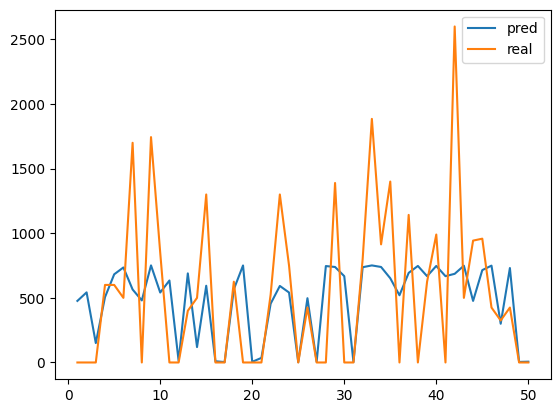

In [60]:
import matplotlib.pyplot as plt
plt.plot(X_num, pred_price, label = 'pred')
plt.plot(X_num, real_price, label = 'real')
plt.legend()
plt.show()

In [25]:
# 데이콘 테스트 데이터 불러오기
dacon_test = pd.read_csv('/content/test.csv')

# 테스트 셋의 딥러닝 독립 변수들 지정하기
cols_dacon = ['Age', 'Working_Week (Yearly)', 'Losses']
D_test = dacon_test[cols_dacon]

# 앞에서 만든 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('/content/data/model/dacon_model.hdf5')

# ID와 예측 값이 들어갈 빈 리스트 만들기
ids = []

# 불러온 모델에 K_test 적용하고 예측 값 만들기
Y_prediction = model.predict(D_test).flatten()
for i in range(len(D_test)) :
  id = dacon_test['ID'][i]
  prediction = Y_prediction[i]
  ids.append([id, prediction])

313/313 [==============================] - 1s 3ms/step


In [26]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = str(timestr)
outdir = './'

In [27]:
df = pd.DataFrame(ids, columns = ['ID', 'Income'])
df.to_csv(str(outdir + filename + '_submission.csv'))